In [1]:
import numpy as np

### Embedding

### Attention Scores

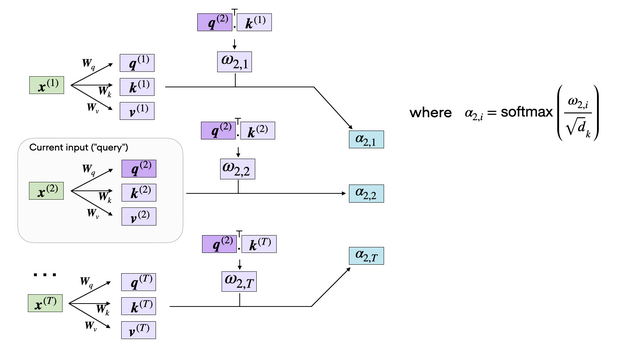

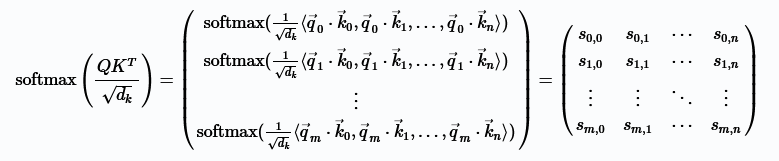

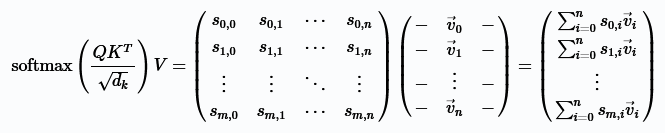

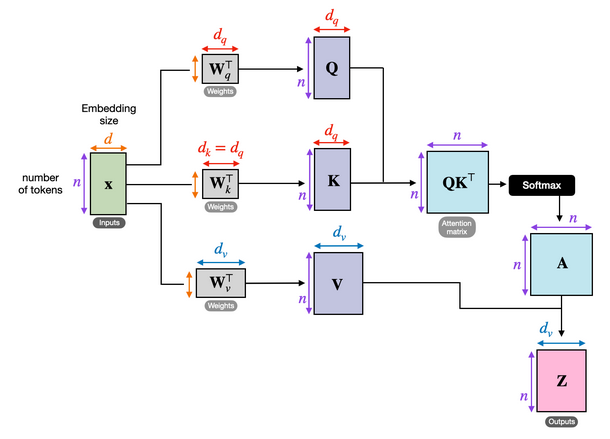

### Cross Attention

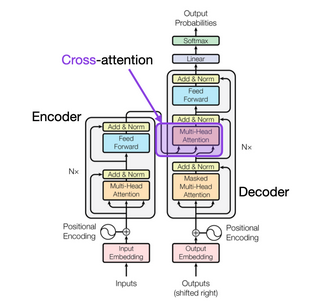

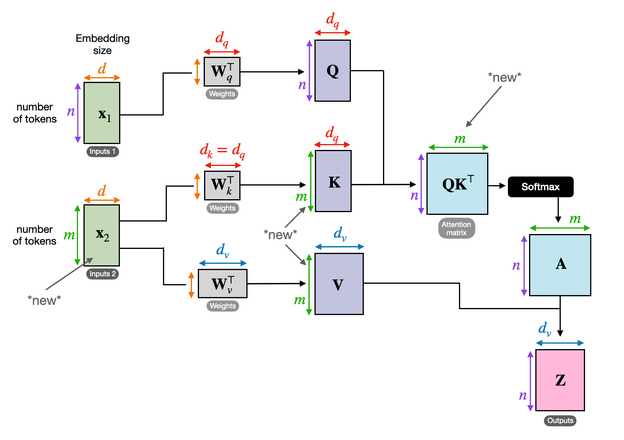